In [2]:
from datetime import datetime

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_csv("Dataset/Cleaned_Main_DS.csv")
dataset = dataset.fillna('') 

In [15]:
dataset

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,Southwest,377,2,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,624.0,,1100 W 39TH PL
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,Central,163,2,BATTERY - SIMPLE ASSAULT,25,M,Hispanic/Laotianatin/Mexican,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,624.0,,700 S HILL ST
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,Unknown,POLICE FACILITY,,Adult Arrest,845.0,,200 E 6TH ST
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",,Invest Cont,745.0,998.0,5400 CORTEEN PL
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,Unknown,BEAUTY SUPPLY STORE,,Invest Cont,740.0,,14400 TITUS ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752906,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,N Hollywood,1548,2,"BUNCO, GRAND THEFT",25,M,White,OTHER PREMISE,,Invest Cont,662.0,,5300 DENNY AV
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,Foothill,1663,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,Hispanic/Laotianatin/Mexican,"VEHICLE, PASSENGER/TRUCK",,Invest Cont,740.0,,12500 BRANFORD ST
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,Foothill,1602,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic/Laotianatin/Mexican,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,230.0,,12800 FILMORE ST
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,77th Street,1239,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,Black,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,230.0,,6100 S VERMONT AV


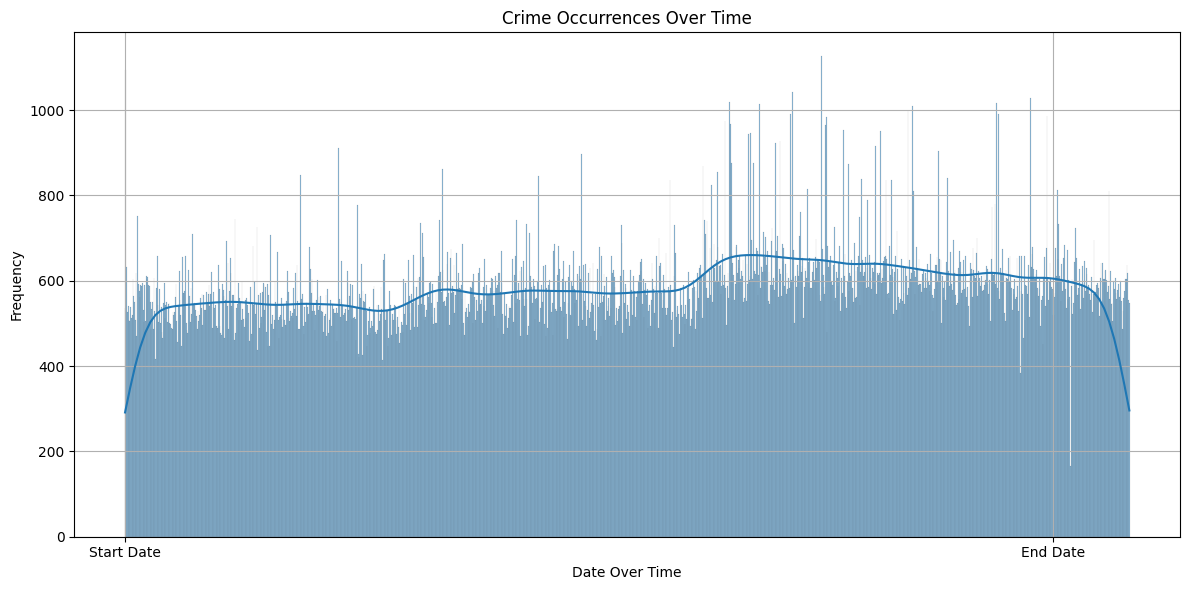

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['DATE OCC'], bins=30, kde=True)
plt.title('Crime Occurrences Over Time')
plt.xlabel('Date Over Time')
plt.ylabel('Frequency')
plt.xticks(ticks=[dataset['DATE OCC'].iloc[0], dataset['DATE OCC'].iloc[-1]], labels=['Start Date', 'End Date'])
plt.grid()

plt.tight_layout()
plt.show()

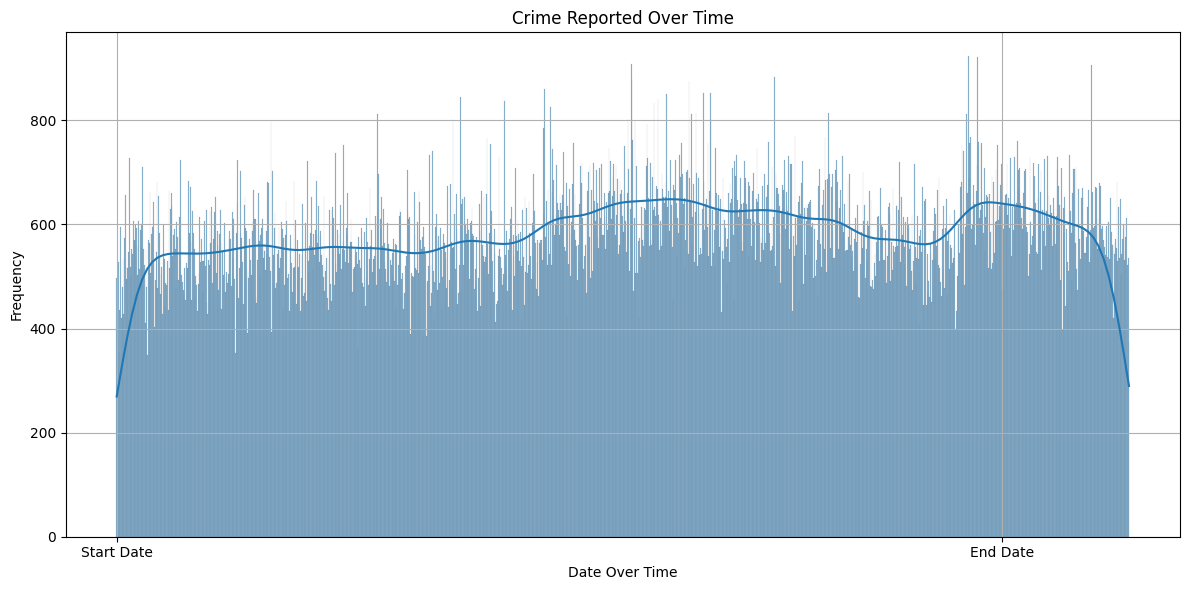

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Date Rptd'], bins=30, kde=True)
plt.title('Crime Reported Over Time')
plt.xlabel('Date Over Time')
plt.ylabel('Frequency')
plt.xticks(ticks=[dataset['DATE OCC'].iloc[0], dataset['DATE OCC'].iloc[-1]], labels=['Start Date', 'End Date'])
plt.grid()

plt.tight_layout()
plt.show()


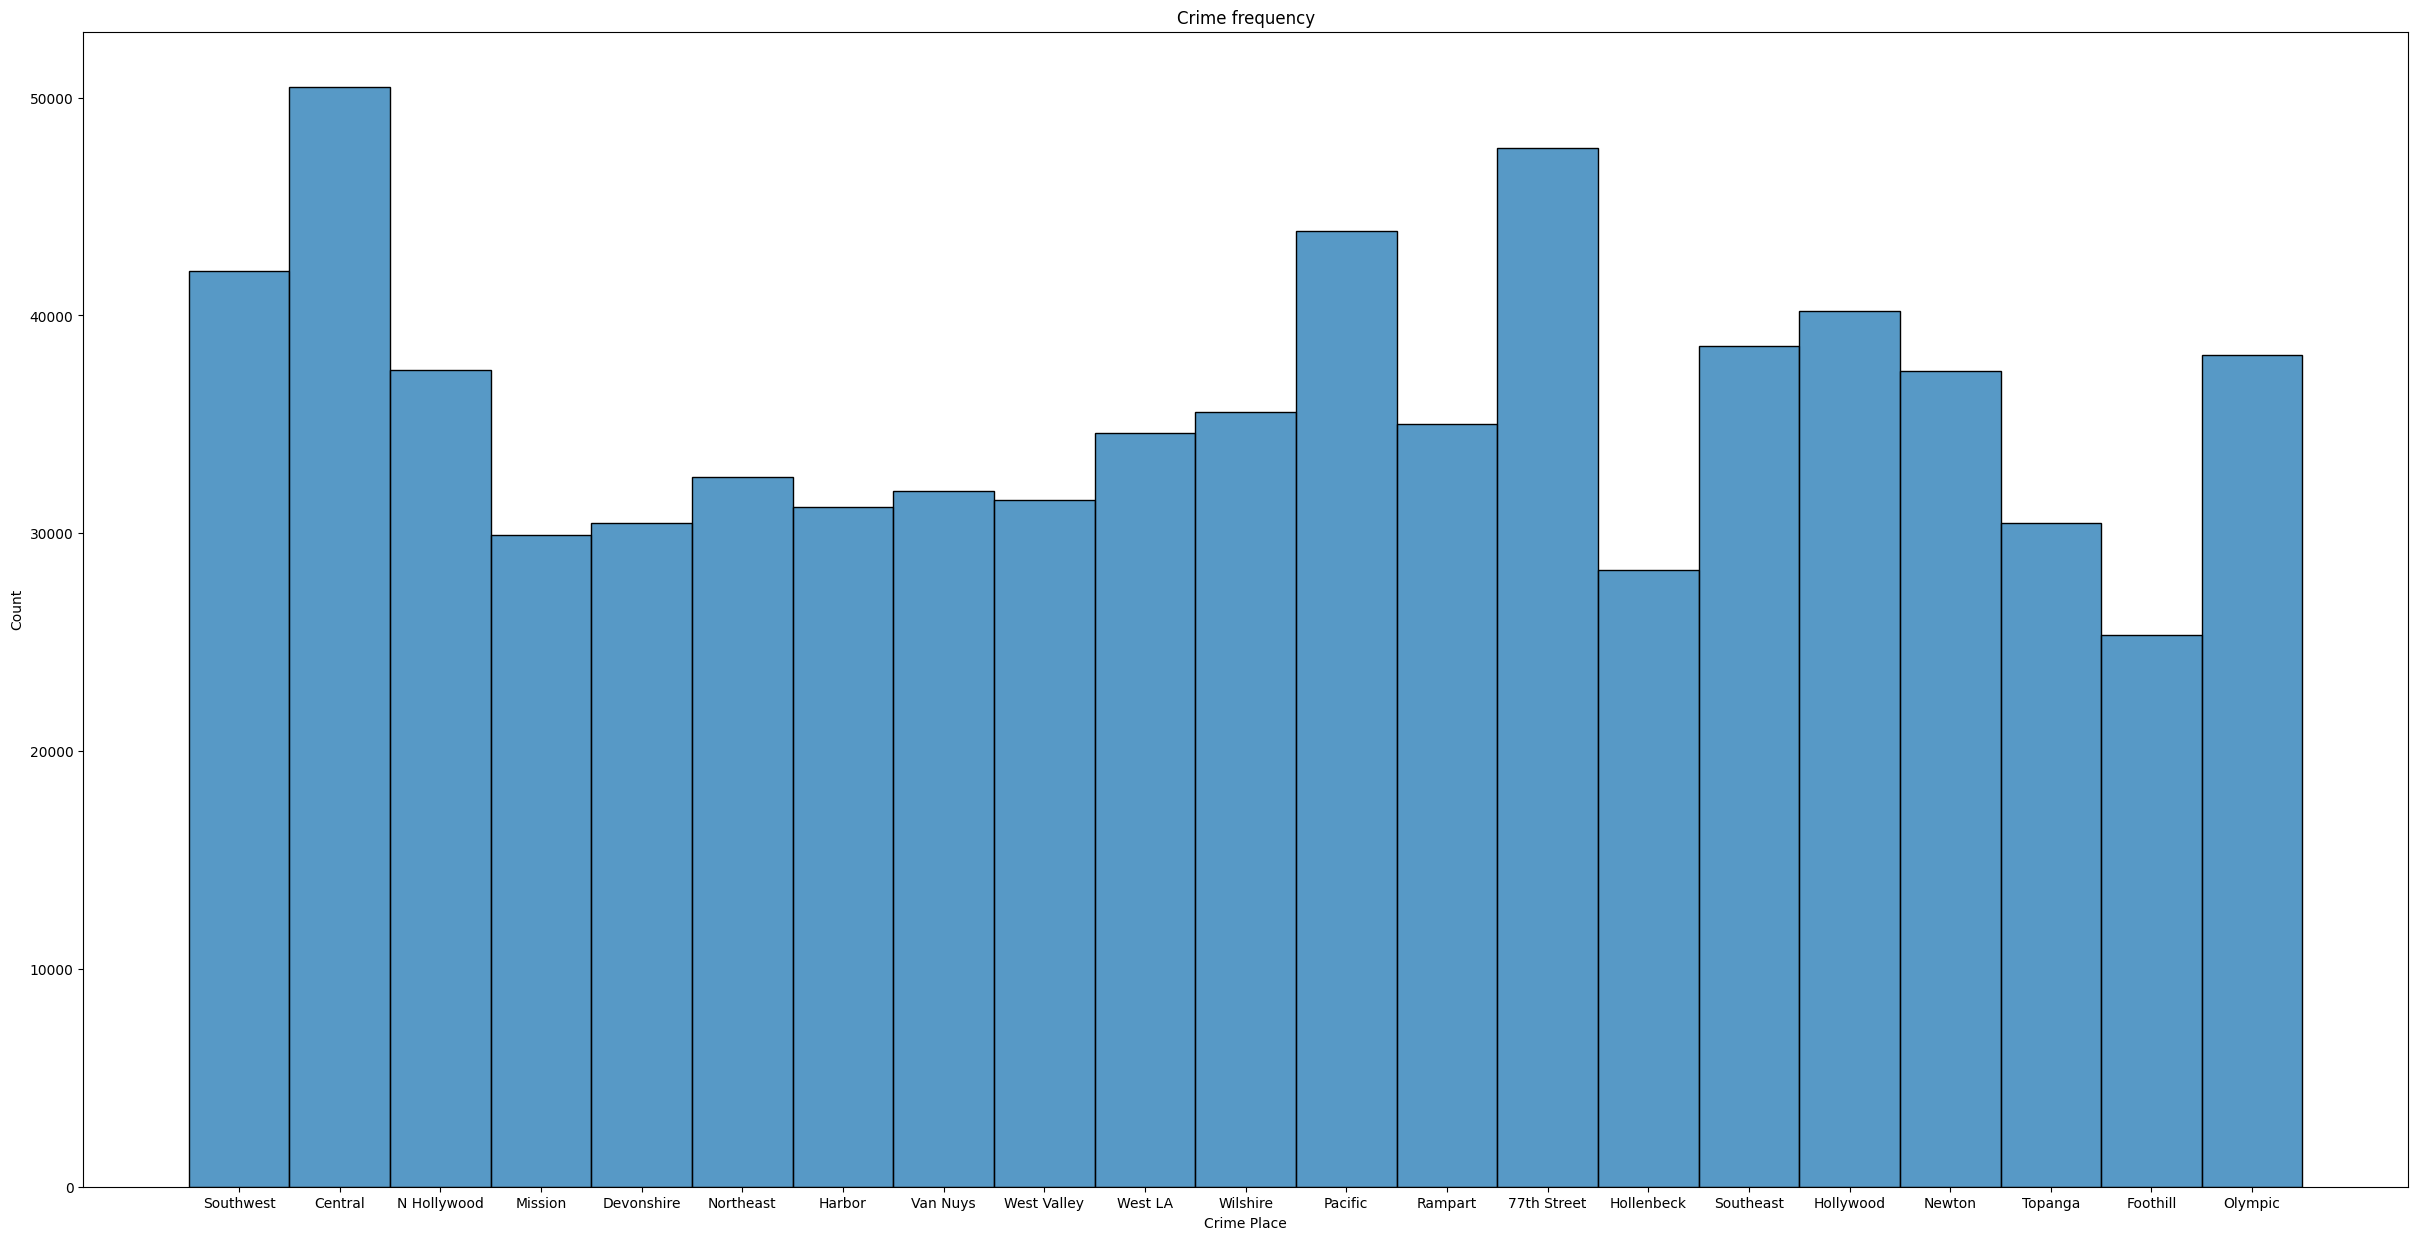

In [18]:
plt.figure(figsize=(30, 15))
sns.histplot(dataset["AREA NAME"])
plt.title("Crime frequency")
plt.xlabel("Crime Place")
plt.ylabel("Count")
plt.show()

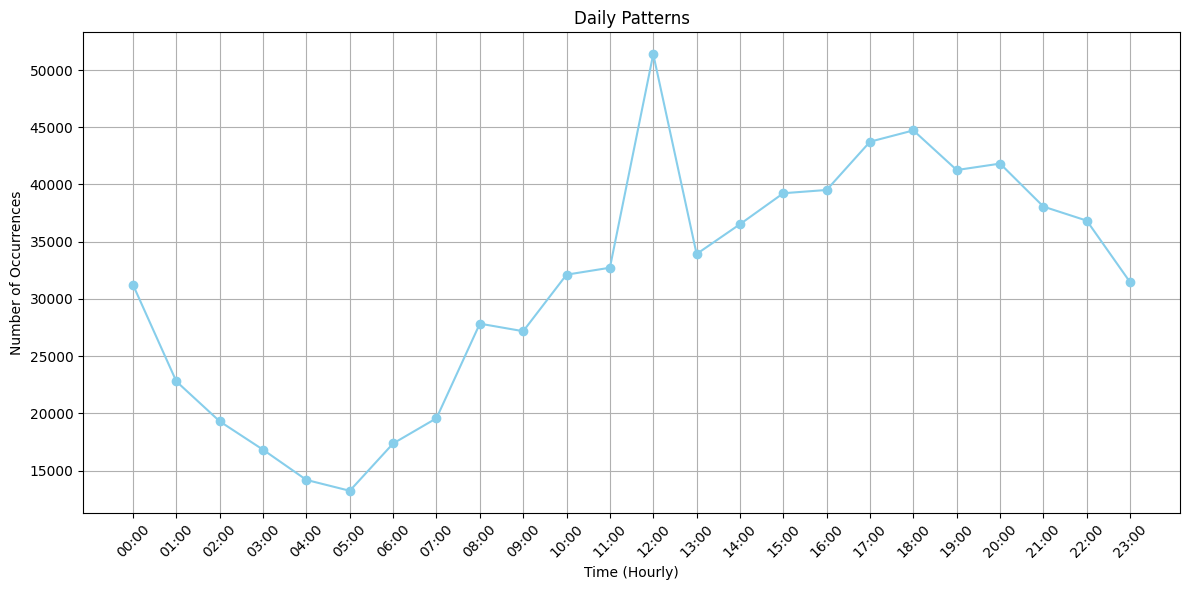

In [19]:
def int_to_time(time_int):
    time_str = str(time_int).zfill(4)
    return datetime.strptime(time_str, "%H%M").time()

dataset['TIME OCC'] = dataset['TIME OCC'].apply(int_to_time)
dataset['TIME OCC'] = pd.to_datetime(dataset['TIME OCC'], format="%H:%M:%S")

dataset['Hour Occ'] = dataset['TIME OCC'].dt.floor('h') 
trend_data = dataset.groupby('Hour Occ').size().reset_index(name='occurrences')
trend_data['Hour Occ'] = trend_data['Hour Occ'].dt.strftime('%H:%M')

plt.figure(figsize=(12, 6))
plt.plot(trend_data['Hour Occ'], trend_data['occurrences'], marker='o', color='skyblue')
plt.title('Daily Patterns')
plt.xlabel('Time (Hourly)')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Unique races in Vict Descent column:
['Black' 'Hispanic/Laotianatin/Mexican' 'Unknown' 'White'
 'Otherther Asian' 'Other' '' 'Chinese' 'Filipino' 'Korean'
 'American Indian/Alaskan Native' 'Vietnamese' 'Asian Indian' 'Japanese'
 'Pacific Islander' 'Samoan' 'Guamanian' 'Hawaiian' 'Cambodian' 'Laotian'
 '-']

Unique crimes in Crm Cd Desc column:
[624.0 845.0 745.0 740.0 121.0 442.0 946.0 341.0 330.0 930.0 648.0 626.0
 440.0 354.0 210.0 230.0 310.0 510.0 420.0 761.0 236.0 662.0 350.0 860.0
 480.0 623.0 956.0 900.0 888.0 331.0 901.0 886.0 421.0 647.0 940.0 810.0
 922.0 812.0 220.0 625.0 755.0 649.0 434.0 815.0 251.0 320.0 850.0 668.0
 902.0 664.0 920.0 343.0 437.0 753.0 928.0 910.0 760.0 762.0 661.0 351.0
 821.0 237.0 903.0 813.0 666.0 820.0 627.0 805.0 763.0 441.0 122.0 443.0
 450.0 410.0 890.0 520.0 670.0 951.0 660.0 654.0 352.0 250.0 110.0 933.0
 652.0 950.0 231.0 345.0 822.0 814.0 932.0 622.0 471.0 235.0 470.0 921.0
 906.0 433.0 651.0 943.0 653.0 436.0 439.0 806.0 949.0 522.0 446.0 113

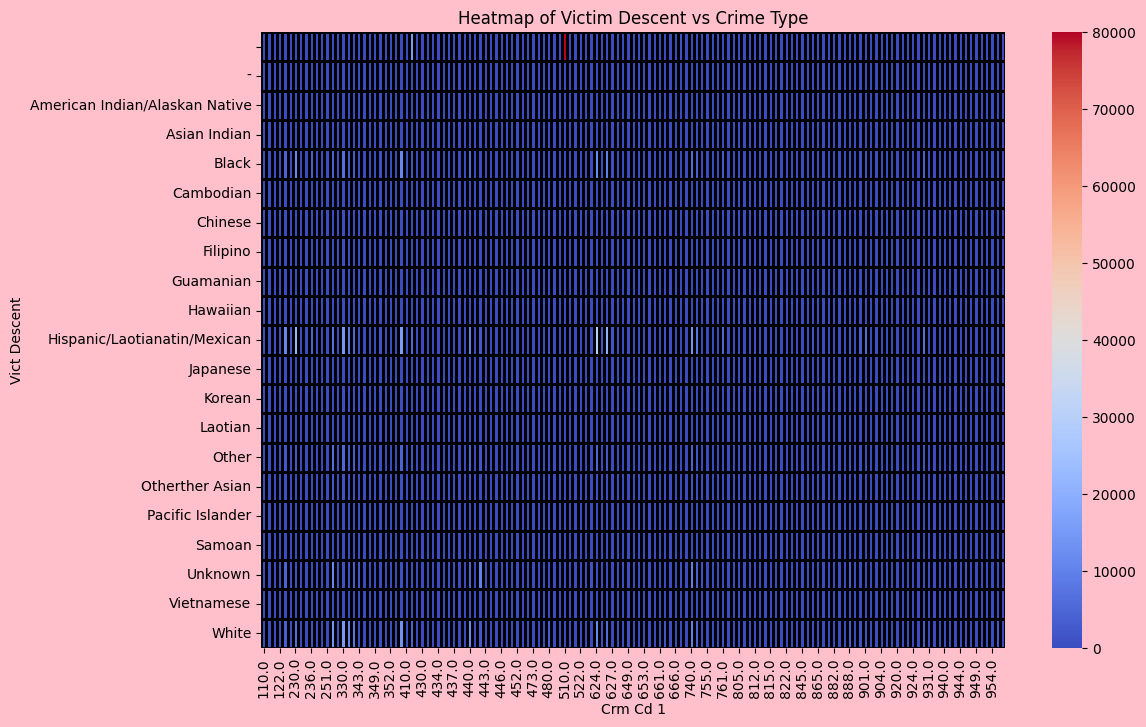

In [20]:

vict_descent_races = dataset['Vict Descent'].unique()
print("Unique races in Vict Descent column:")
print(vict_descent_races)

crime_types = dataset['Crm Cd 1'].unique()
print("\nUnique crimes in Crm Cd Desc column:")
print(crime_types)

pivot_table = pd.crosstab(dataset['Vict Descent'], dataset['Crm Cd 1'])

plt.figure(figsize=(12, 8),facecolor='pink')  
plt.title('Heatmap of Victim Descent vs Crime Type')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, linecolor='black', linewidths=1) 
plt.show()




Unique crimes in Crm Cd 1 column:
[624.0 745.0 121.0 442.0 341.0 330.0 930.0 626.0 440.0 354.0 210.0 230.0
 310.0 740.0 761.0 236.0 662.0 845.0 350.0 860.0 480.0 956.0 900.0 888.0
 331.0 901.0 886.0 420.0 421.0 946.0 647.0 940.0 810.0 922.0 812.0 220.0
 625.0 755.0 434.0 815.0 251.0 320.0 850.0 902.0 664.0 920.0 343.0 437.0
 928.0 753.0 910.0 760.0 623.0 762.0 661.0 351.0 821.0 668.0 237.0 649.0
 813.0 648.0 666.0 820.0 627.0 805.0 122.0 443.0 450.0 410.0 520.0 951.0
 654.0 352.0 250.0 110.0 652.0 441.0 950.0 670.0 231.0 345.0 890.0 822.0
 814.0 932.0 510.0 903.0 933.0 470.0 921.0 235.0 906.0 763.0 433.0 651.0
 943.0 653.0 436.0 439.0 806.0 622.0 446.0 113.0 660.0 438.0 522.0 451.0
 485.0 944.0 954.0 949.0 942.0 347.0 435.0 880.0 756.0 444.0 474.0 471.0
 931.0 349.0 475.0 430.0 473.0 452.0 353.0 865.0 870.0 924.0 840.0 948.0
 '' 904.0 830.0 445.0 432.0]


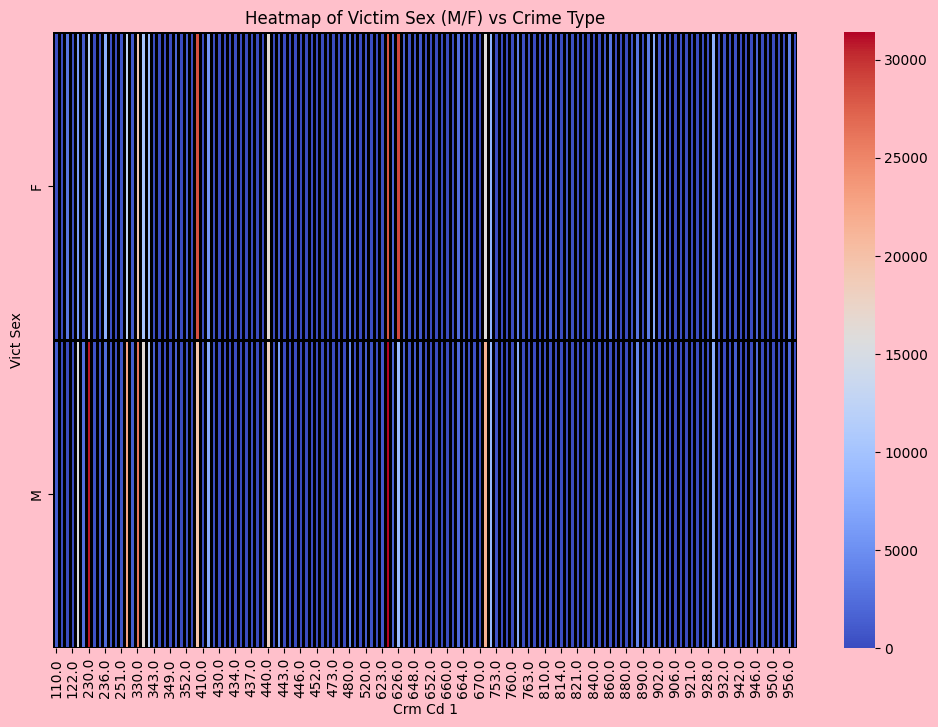

In [21]:
#crime correlation with victim sex
#filtered dataset includes records with only M or F
filtered_dataset = dataset[dataset['Vict Sex'].isin(['M', 'F'])]

crime_types = filtered_dataset['Crm Cd 1'].unique()
print("\nUnique crimes in Crm Cd 1 column:")
print(crime_types)

pivot_table = pd.crosstab(filtered_dataset['Vict Sex'], filtered_dataset['Crm Cd 1'])

plt.figure(figsize=(12, 8), facecolor='pink')  
plt.title('Heatmap of Victim Sex (M/F) vs Crime Type')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, linecolor='black', linewidths=1)  


plt.show()

